In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data_path = 'IMDB_Movies.csv'
movies_df = pd.read_csv(data_path)

In [3]:
# Display the first few rows of the dataset
print(movies_df.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [4]:
# Data Cleaning
# Fill missing values in 'budget' column with the mean
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)

In [5]:
# Remove Duplicates
movies_df.drop_duplicates(inplace=True)

In [6]:
# Convert 'title_year' to datetime
movies_df['title_year'] = pd.to_datetime(movies_df['title_year'], format='%Y') 

In [7]:
# Feature Engineering Extract year from the release date
movies_df['title_year'] = movies_df['title_year'].dt.year

In [8]:
# Display the first few rows of the cleaned dataset
print(movies_df.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

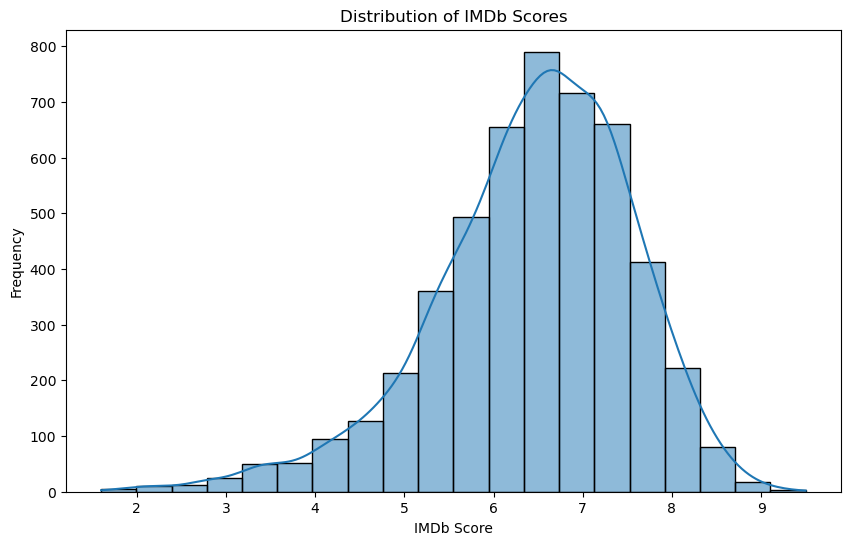

In [9]:
# Visualize the distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

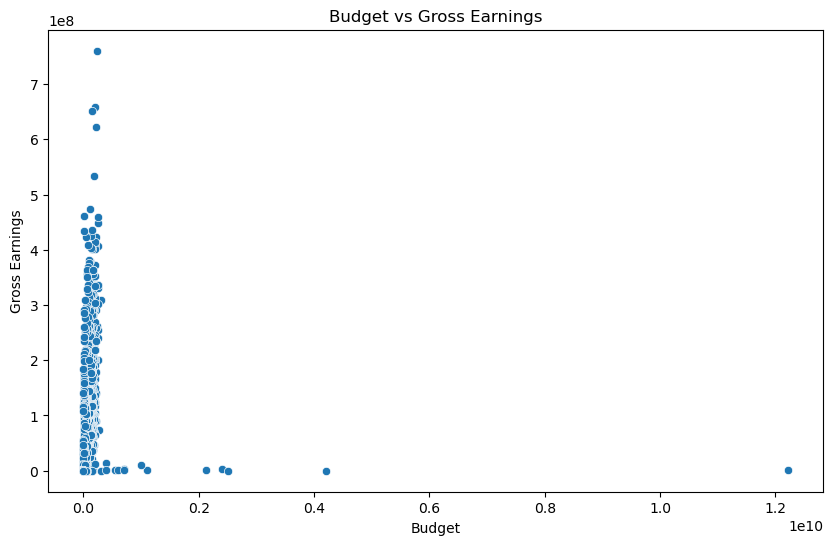

In [10]:
# Visualize the relationship between budget and gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='gross', data=movies_df)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

In [11]:
# Select only numeric columns for correlation analysis
numeric_columns = movies_df.select_dtypes(include=[np.number])

In [12]:
# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

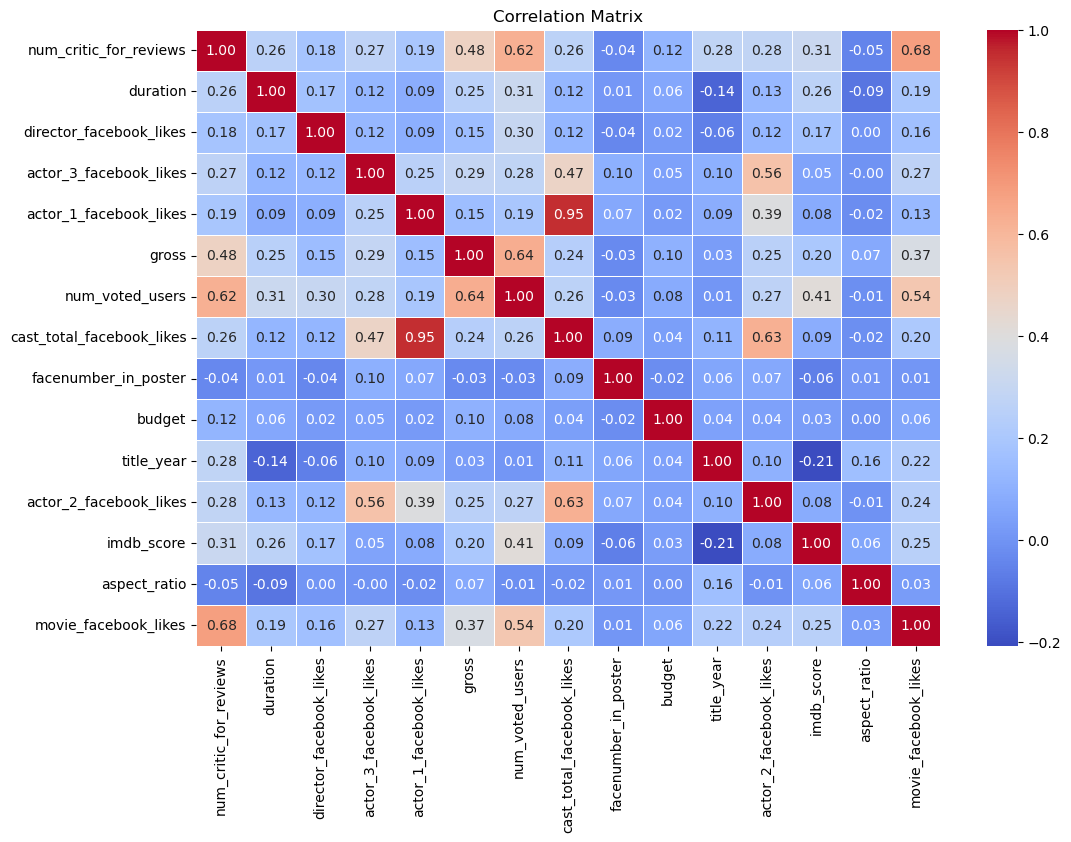

In [13]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Movie Genre Analysis
genres_df = movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=0, drop=True).to_frame(name='genre')
genre_stats = pd.merge(genres_df, movies_df[['imdb_score']], left_index=True, right_index=True)

# Calculate descriptive statistics for each genre
genre_statistics = (
    genre_stats.groupby('genre')['imdb_score']
    .agg(['mean', 'median', lambda x: x.mode().iat[0], 'min', 'max', 'var', 'std'])
    .rename(columns={'<lambda_0>': 'mode'})
)

print("Movie Genre Analysis:")
print("Descriptive Statistics for IMDB Score by Genre:")
print(genre_statistics)

Movie Genre Analysis:
Descriptive Statistics for IMDB Score by Genre:
                 mean  median  mode  min  max       var       std
genre                                                            
Action       7.900000    7.90   7.9  7.9  7.9  0.000000  0.000000
Adventure    7.493873    7.10   7.1  7.1  7.9  0.160138  0.400172
Animation    7.259504    7.10   7.1  6.8  7.9  0.149142  0.386189
Biography    7.783562    7.90   7.9  6.8  7.9  0.084402  0.290521
Comedy       7.654672    7.90   7.9  6.8  8.5  0.177998  0.421898
Crime        7.395583    7.10   7.1  6.8  8.5  0.205048  0.452823
Documentary  7.635537    7.90   7.9  6.8  7.9  0.164810  0.405968
Drama        7.383703    7.10   7.1  6.8  8.5  0.209357  0.457555
Family       7.362132    7.10   7.1  6.6  8.5  0.467035  0.683399
Fantasy      7.289073    7.10   7.1  6.2  8.5  0.396232  0.629470
Film-Noir    7.133333    7.10   7.1  6.8  7.9  0.162667  0.403320
Game-Show    7.900000    7.90   7.9  7.9  7.9       NaN       NaN
Histor

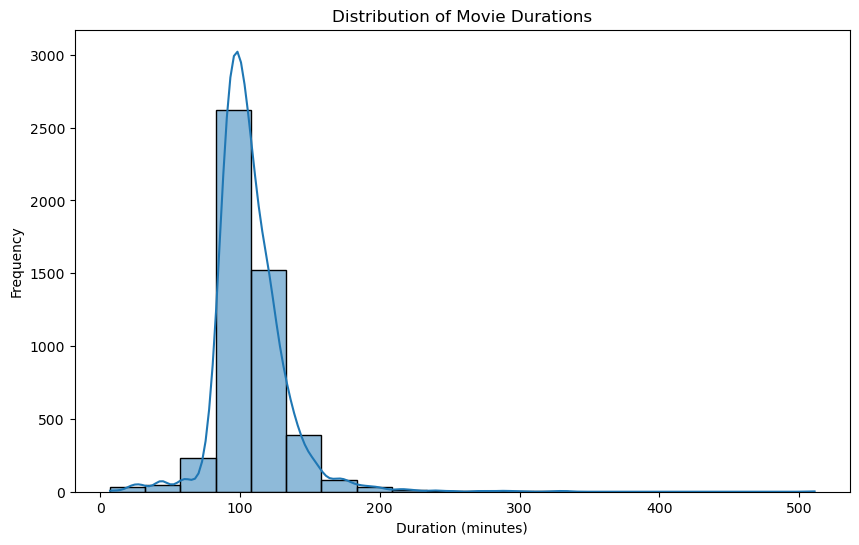

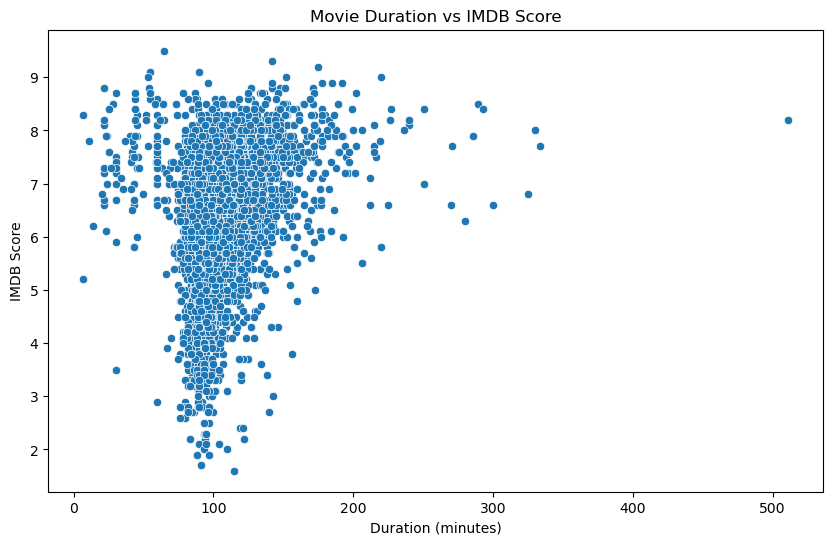

In [15]:
# Movie Duration Analysis
plt.figure(figsize=(10, 6))
sns.histplot(x='duration', data=movies_df, bins=20, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='imdb_score', data=movies_df)
plt.title("Movie Duration vs IMDB Score")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDB Score")
plt.show()

In [16]:
# Language Analysis
common_languages = movies_df['language'].value_counts().index[:5]
language_stats = movies_df.groupby('language')['imdb_score'].describe().loc[common_languages]
print("Language Analysis:")
print("Common Languages:", common_languages)
print("Descriptive Statistics for IMDB Score by Language:")
print(language_stats)

Language Analysis:
Common Languages: Index(['English', 'French', 'Spanish', 'Hindi', 'Mandarin'], dtype='object', name='language')
Descriptive Statistics for IMDB Score by Language:
           count      mean       std  min   25%   50%    75%  max
language                                                         
English   4662.0  6.397405  1.121112  1.6  5.80  6.50  7.200  9.5
French      73.0  7.038356  0.726986  4.9  6.60  7.20  7.500  8.4
Spanish     40.0  6.937500  0.855057  4.4  6.60  7.15  7.500  8.2
Hindi       28.0  6.632143  1.398956  2.8  5.85  6.95  7.800  8.5
Mandarin    24.0  6.787500  1.036848  3.2  6.20  7.05  7.525  7.9


In [17]:
# Director Analysis
top_directors = movies_df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(5)
director_percentiles = movies_df.groupby('director_name')['imdb_score'].describe(percentiles=[.25, .50, .75])
print("Director Analysis - Top Directors:")
print(top_directors)
print("Percentile Calculations for Director Contribution:")
print(director_percentiles)

Director Analysis - Top Directors:
director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Sadyk Sher-Niyaz    8.7
Cary Bell           8.7
Mike Mayhall        8.6
Name: imdb_score, dtype: float64
Percentile Calculations for Director Contribution:
                    count  mean  std  min  25%  50%  75%  max
director_name                                                
A. Raven Cruz         1.0   1.9  NaN  1.9  1.9  1.9  1.9  1.9
Aaron Hann            1.0   6.0  NaN  6.0  6.0  6.0  6.0  6.0
Aaron Schneider       1.0   7.1  NaN  7.1  7.1  7.1  7.1  7.1
Aaron Seltzer         1.0   2.7  NaN  2.7  2.7  2.7  2.7  2.7
Abel Ferrara          1.0   6.6  NaN  6.6  6.6  6.6  6.6  6.6
...                   ...   ...  ...  ...  ...  ...  ...  ...
Zoran Lisinac         1.0   7.1  NaN  7.1  7.1  7.1  7.1  7.1
Álex de la Iglesia    1.0   6.1  NaN  6.1  6.1  6.1  6.1  6.1
Émile Gaudreault      1.0   6.7  NaN  6.7  6.7  6.7  6.7  6.7
Éric Tessier          1.0   6.6  NaN  6.6  6.6  6.6  6.6  6.6
Éti

In [18]:
# Budget Analysis
correlation_budget_gross = movies_df[['budget', 'gross']].corr()
movies_df['profit_margin'] = (movies_df['gross'] - movies_df['budget']) / movies_df['budget']
top_profit_movies = movies_df.sort_values(by='profit_margin', ascending=False).head(5)

print("Budget Analysis:")
print("Correlation between Budget and Gross Earnings:")
print(correlation_budget_gross)
print("Top Movies with Highest Profit Margin:")
print(top_profit_movies[['movie_title', 'budget', 'gross', 'profit_margin']])

Budget Analysis:
Correlation between Budget and Gross Earnings:
          budget     gross
budget  1.000000  0.100529
gross   0.100529  1.000000
Top Movies with Highest Profit Margin:
                        movie_title   budget        gross  profit_margin
4793           Paranormal Activity   15000.0  107917283.0    7193.485533
4799                     Tarnation     218.0     592014.0    2714.660550
4707       The Blair Witch Project   60000.0  140530114.0    2341.168567
4984         The Brothers McMullen   25000.0   10246600.0     408.864000
4936  The Texas Chain Saw Massacre   83532.0   30859000.0     368.427285
